In [1]:
import pandas as pd
import os

In [2]:
dataframes = {}
for i in os.listdir():
    if i[-4:] == ".csv":
        dataframes[i[:-4]] = pd.read_csv(i)

In [3]:
d = dataframes

In [195]:
import sqlite3

In [198]:
    con = sqlite3.connect("TheDarwinProject.db")


In [226]:
anterior_posterior(d['game_session'].sessionid[0])

array([1542271473, 1542259060, 1542272070])

In [ ]:
def anterior_posterior(sessio):
    con = sqlite3.connect("TheDarwinProject.db")

    verses_sql = '''select a.time_started as PRESENT,
    (select b.time_started 
        from game_session b 
        where b.time_started<a.time_started 
        and b.server_ip=a.server_ip
        order by time_started desc limit 1) as PASSAT,
    (select c.time_started 
        from game_session c 
        where c.time_started>a.time_started 
        and c.server_ip=a.server_ip
        order by time_started asc limit 1) as FUTUR,
        (select c.sessionid
        from game_session c 
        where c.time_started>a.time_started 
        and c.server_ip=a.server_ip
        order by time_started asc limit 1) as FUTUR    
    from game_session a
    where sessionid=%d;''' % sessio
    df_verses = pd.read_sql(verses_sql, con)
    return df_verses

* Game session és bàsicament un diccionari que donat una id de partida et diu a quina stamp esta.

* Player ranking dona els numeros dels jugadors beginner intermediate i pro

* Weapon desc es id to weapon (als eventos)

,gameid,sessionid,playerguid,framenumber,frametime_ms,posX,posY,posZ,viewW,viewX,viewY,viewZ,tickflags,stateflags,fov,health,weapon_id
0,185,2687592411372870805,Lori_Ross,5433,0,-122429.656250,-3137.966309,2432.728516,0.546236,0.090341,0.059410,-0.830624,0,2,90,0,11
1,185,2687592411372870805,Lori_Ross,5653,6890,-124511.312500,-3208.429688,2434.120117,-0.469987,0.129939,-0.070177,-0.870232,0,2,90,0,11
2,185,2687592411372870805,Jesus_Roberts,5664,344,-124727.515625,-2825.187500,2253.628174,1.000000,0.000000,-0.000192,0.000000,0,4,0,0,0
3,185,2687592411372870805,Lori_Ross,5664,344,-124641.054688,-3015.759521,2386.918701,-0.475728,0.132527,-0.072760,-0.866502,0,0,90,0,11
4,185,2687592411372870805,Lori_Ross,5715,1597,-125007.289062,-2196.545166,2423.564697,-0.526463,0.116451,-0.073071,-0.839009,0,2,90,0,11
5,185,2687592411372870805,Lori_Ross,5764,1535,-124822.890625,-1523.803345,2398.206299,0.119125,0.201149,0.024653,-0.971978,0,2,90,0,11
6,185,2687592411372870805,Richard_Johnson,5775,345,-125062.359375,-1608.980469,2253.628174,1.000000,0.000000,0.000000,0.000000,0,4,0,0,0
7,185,2687592411372870805,Lori_Ross,5775,345,-124827.367188,-1470.983765,2253.628174,0.126081,0.126513,0.016214,-0.983786,0,0,90,0,11
8,185,2687592411372870805,Lori_Ross,5798,718,-125042.257812,-1401.001709,2253.628174,0.119050,0.132616,0.016047,-0.983861,0,2,90,0,11
9,185,2687592411372870805,Richard_Johnson,5811,406,-125062.359375,-1608.980469,2253.628174,1.000000,0.000000,0.000000,0.000000,0,4,0,0,0


In [141]:
llista_ips = d['game_session'].server_ip.unique()

In [220]:
nex = d['game_session'].sessionid[0]

In [249]:
create_datasets_partida(nex)

(   gameid            sessionid   server_ip  server_name  time_started
 0     185  2687592411372870805  176.57.0.0  GameSession    1542271473,
    gameid       playerguid            sessionid  playername  \
 0     185  Michelle_Rogers  2687592411372870805         NaN   
 1     185        Lori_Ross  2687592411372870805         NaN   
 2     185      Laura_Davis  2687592411372870805         NaN   
 5     185  Richard_Johnson  2687592411372870805         NaN   
 6     185    Jesus_Roberts  2687592411372870805         NaN   
 
    session_duration_seconds  kills  deaths  longest_kill_streak  \
 0                       202      0       0                    0   
 1                       447      0       1                    0   
 2                       741      0       1                    0   
 5                       949      0       1                    0   
 6                       983      3       0                    3   
 
    average_kill_distance  shortest_kill_distance  longest_ki

In [269]:
def ip_match(n):
    return d['game_session'].server_ip[d['game_session'].sessionid == n].iloc[0]

In [12]:
from tqdm import tqdm as t

In [15]:
for i in t(list(d['game_session'].sessionid.unique())):
    create_datasets_partida(i)

100%|██████████| 144/144 [01:50<00:00,  1.36it/s]


In [14]:
def create_datasets_partida(n):
    ip = ip_match(n)
    gs = d['game_session'][d['game_session'].sessionid == n]
    players = d['player_session'][d['player_session'].sessionid == n]
    gframes = d['game_frame'][d['game_frame'].sessionid == n]
    pstate = d['player_state'][d['player_state'].sessionid == n]
    present, passat, futur, futur_id = anterior_posterior(n).values[0]
    kills = d['player_kill'][(present <= d['player_kill'].timestamp) & (d['player_kill'].timestamp <= futur) & (d['player_kill'].server_ip == ip)]
    n = str(n)
    gs.to_csv(os.path.join(n, "game_session.csv"))
    players.to_csv(os.path.join(n, "player_session.csv"))
    gframes.to_csv(os.path.join(n, "game_frame.csv"))
    kills.to_csv(os.path.join(n, "player_kill.csv"))
    pstate.to_csv(os.path.join(str(n), "player_state.csv"))
    return None

In [242]:
l = d['game_session'][d['game_session'].server_ip == llista_ips[0]].time_started

In [243]:
d['player_kill']

,gameid,timestamp,server_ip,server_name,killer_guid,victim_guid,frames
0,185,1542271482,176.57.0.0,GameSession,76561198137289456,76561198071381372,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
1,185,1542271605,162.244.0.0,GameSession,76561198124223758,76561198188131502,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
2,185,1542271623,162.244.0.0,GameSession,76561198797730160,76561198258586752,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
3,185,1542271667,176.57.0.0,GameSession,76561198088349192,76561198123513546,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
4,185,1542271671,176.57.0.0,GameSession,76561198062130779,76561198870484527,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
5,185,1542271727,176.57.0.0,GameSession,76561198055814661,76561198833744190,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
6,185,1542271964,162.244.0.0,GameSession,76561198124223758,76561198869630926,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
7,185,1542271942,176.57.0.0,GameSession,76561198071381372,76561198192879225,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
8,185,1542272015,176.57.0.0,GameSession,76561198060054396,76561198868862778,"[{""killer"": {""tickflags"": 32, ""fov"": 90, ""posi..."
9,185,1542272025,176.57.0.0,GameSession,76561198210391304,76561198361901786,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."


In [151]:
import datetime

In [157]:
form = lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')

In [180]:
form(1542688984)

'2018-11-20 05:43:04'

In [212]:
d.keys()a

dict_keys(['player_session', 'player_ranking', 'game_frame', 'weapon_desc', 'player_kill', 'player_state', 'game_session'])

In [217]:
d['player_ranking']

,gameid,playerguid,skill_level
0,185,76561198198204866,Beginner
1,185,76561198398395706,Intermediate
2,185,76561198013949306,Advanced


In [213]:
d['player_session']

,gameid,playerguid,sessionid,playername,session_duration_seconds,kills,deaths,longest_kill_streak,average_kill_distance,shortest_kill_distance,longest_kill_distance,accuracy
0,185,Michelle_Rogers,2687592411372870805,NaN,202,0,0,0,0.000000,0.000000,0.000000,0.000000
1,185,Lori_Ross,2687592411372870805,NaN,447,0,1,0,0.000000,0.000000,0.000000,0.000000
2,185,Laura_Davis,2687592411372870805,NaN,741,0,1,0,0.000000,0.000000,0.000000,0.000000
3,185,Heidi_Walton_DDS,4959622521749720164,NaN,247,0,0,0,0.000000,0.000000,0.000000,0.000000
4,185,Amber_Hall,4959622521749755856,NaN,60,0,0,0,0.000000,0.000000,0.000000,0.000000
5,185,Richard_Johnson,2687592411372870805,NaN,949,0,1,0,0.000000,0.000000,0.000000,0.000000
6,185,Jesus_Roberts,2687592411372870805,NaN,983,3,0,3,2075.765137,871.849182,3914.630371,85.714287
7,185,Margaret_Davis,4959622521749755856,NaN,58,0,0,0,0.000000,0.000000,0.000000,0.000000
8,185,Jesus_Roberts,4959622521749755856,NaN,201,0,1,0,0.000000,0.000000,0.000000,0.000000
9,185,Michael_Allen,4959622521749720164,NaN,560,0,0,0,0.000000,0.000000,0.000000,0.000000


In [261]:
d['game_session'].session_id

AttributeError: 'DataFrame' object has no attribute 'session_id'

In [216]:
d['player_kill']

,gameid,timestamp,server_ip,server_name,killer_guid,victim_guid,frames
0,185,1542271482,176.57.0.0,GameSession,76561198137289456,76561198071381372,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
1,185,1542271605,162.244.0.0,GameSession,76561198124223758,76561198188131502,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
2,185,1542271623,162.244.0.0,GameSession,76561198797730160,76561198258586752,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
3,185,1542271667,176.57.0.0,GameSession,76561198088349192,76561198123513546,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
4,185,1542271671,176.57.0.0,GameSession,76561198062130779,76561198870484527,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
5,185,1542271727,176.57.0.0,GameSession,76561198055814661,76561198833744190,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
6,185,1542271964,162.244.0.0,GameSession,76561198124223758,76561198869630926,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
7,185,1542271942,176.57.0.0,GameSession,76561198071381372,76561198192879225,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
8,185,1542272015,176.57.0.0,GameSession,76561198060054396,76561198868862778,"[{""killer"": {""tickflags"": 32, ""fov"": 90, ""posi..."
9,185,1542272025,176.57.0.0,GameSession,76561198210391304,76561198361901786,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."


In [184]:
d['player_session'][d['player_session'].sessionid == 1542367715]

,gameid,playerguid,sessionid,playername,session_duration_seconds,kills,deaths,longest_kill_streak,average_kill_distance,shortest_kill_distance,longest_kill_distance,accuracy


In [161]:
eval(d['player_kill'].frames[0]) # S'ha de fer una funcio que digui de quina partida es

[{'killer': {'tickflags': 0,
   'fov': 90,
   'position': {'y': 15248.7783203125,
    'x': 62938.7265625,
    'z': 589.5629272460938},
   'weapon_id': 14,
   'viewangles': {'y': -0.06380341947078705,
    'x': 0.041910309344530106,
    'w': 0.8333727121353149,
    'z': 0.5474144220352173},
   'health': 600,
   'stateflags': 1},
  'frametime_ms': 31,
  'victim': {'tickflags': 0,
   'fov': 90,
   'position': {'y': 19001.90234375,
    'x': 64078.06640625,
    'z': 1236.7515869140625},
   'weapon_id': 101,
   'viewangles': {'y': 0.010362963192164898,
    'x': 0.12569430470466614,
    'w': 0.08151087164878845,
    'z': -0.988660454750061},
   'health': 100,
   'stateflags': 1}},
 {'killer': {'tickflags': 0,
   'fov': 90,
   'position': {'y': 15287.99609375, 'x': 62955.984375, 'z': 594.95361328125},
   'weapon_id': 14,
   'viewangles': {'y': -0.06589492410421371,
    'x': 0.04446037486195564,
    'w': 0.826334536075592,
    'z': 0.5575413107872009},
   'health': 600,
   'stateflags': 1},
  'f

In [181]:
sorted(l)

[1542151849,
 1542152216,
 1542158945,
 1542160364,
 1542169455,
 1542169830,
 1542170511,
 1542170723,
 1542171094,
 1542247630,
 1542271473,
 1542272070,
 1542272381,
 1542297842,
 1542297905,
 1542297942,
 1542297966,
 1542298053,
 1542323337,
 1542323694,
 1542323749,
 1542329631,
 1542330111,
 1542338709,
 1542339049,
 1542349812,
 1542349852,
 1542350030,
 1542350322,
 1542350586,
 1542350792,
 1542351079,
 1542351351,
 1542351865,
 1542352400,
 1542367060,
 1542367096,
 1542367166,
 1542367276,
 1542367361,
 1542367479,
 1542367564,
 1542367715,
 1542367810,
 1542629299,
 1542629520,
 1542629534,
 1542630068,
 1542688323,
 1542701282]

In [165]:
import base64

In [170]:
base64.b64decode(eval(d['game_frame'].events.iloc[-1])[0]['data'])

b'{"eventid": 268435462, "eventname": "powerstate", "player": "Ricky_Webb", "power_state": 0}'

In [164]:
d['game_frame'].events.iloc[-1]

'[{"id": 268435462, "name": "powerstate", "data": "eyJldmVudGlkIjogMjY4NDM1NDYyLCAiZXZlbnRuYW1lIjogInBvd2Vyc3RhdGUiLCAicGxheWVyIjogIlJpY2t5X1dlYmIiLCAicG93ZXJfc3RhdGUiOiAwfQ=="}, {"id": 268435462, "name": "powerstate", "data": "eyJldmVudGlkIjogMjY4NDM1NDYyLCAiZXZlbnRuYW1lIjogInBvd2Vyc3RhdGUiLCAicGxheWVyIjogIlJvYmVydF9TdGV2ZW5zX0pyLiIsICJwb3dlcl9zdGF0ZSI6IDB9"}]'

In [55]:
d['game_frame'].events[3741612]

'[{"id": 268435462, "name": "powerstate", "data": "eyJldmVudGlkIjogMjY4NDM1NDYyLCAiZXZlbnRuYW1lIjogInBvd2Vyc3RhdGUiLCAicGxheWVyIjogIlJpY2t5X1dlYmIiLCAicG93ZXJfc3RhdGUiOiAwfQ=="}, {"id": 268435462, "name": "powerstate", "data": "eyJldmVudGlkIjogMjY4NDM1NDYyLCAiZXZlbnRuYW1lIjogInBvd2Vyc3RhdGUiLCAicGxheWVyIjogIlJvYmVydF9TdGV2ZW5zX0pyLiIsICJwb3dlcl9zdGF0ZSI6IDB9"}]'

In [8]:
d['player_session'][d['player_session'].playerguid == 'Beginner']

,gameid,playerguid,sessionid,playername,session_duration_seconds,kills,deaths,longest_kill_streak,average_kill_distance,shortest_kill_distance,longest_kill_distance,accuracy
288,185,Beginner,4959622521724689016,NaN,443,0,1,0,0.000000,0.000000,0.000000,0.0
365,185,Beginner,4959622521726874797,NaN,489,0,1,0,0.000000,0.000000,0.000000,0.0
446,185,Beginner,2009668275064032533,NaN,1257,2,1,2,201.406769,126.431015,276.382538,50.0
1078,185,Beginner,2687592411509916799,NaN,140,0,1,0,0.000000,0.000000,0.000000,0.0


In [9]:
d['player_session'][d['player_session'].playerguid == 'Intermediate']

,gameid,playerguid,sessionid,playername,session_duration_seconds,kills,deaths,longest_kill_streak,average_kill_distance,shortest_kill_distance,longest_kill_distance,accuracy
65,185,Intermediate,6300479610403288849,NaN,538,0,1,0,0.000000,0.000000,0.000000,0.000000
101,185,Intermediate,4959622521747852516,NaN,698,0,1,0,0.000000,0.000000,0.000000,0.000000
123,185,Intermediate,4959622521747980894,NaN,492,0,1,0,0.000000,0.000000,0.000000,0.000000
146,185,Intermediate,4959622521748053636,NaN,910,2,0,2,893.041382,299.740051,1486.342651,66.666672
659,185,Intermediate,8330405089890209083,NaN,671,0,1,0,0.000000,0.000000,0.000000,100.000000


In [10]:
d['player_session'][d['player_session'].playerguid == 'Pro']

,gameid,playerguid,sessionid,playername,session_duration_seconds,kills,deaths,longest_kill_streak,average_kill_distance,shortest_kill_distance,longest_kill_distance,accuracy
458,185,Pro,4959622521726898546,NaN,1668,1,1,1,127.073860,127.073860,127.073860,33.333336
832,185,Pro,4959622521770107178,NaN,304,0,0,0,0.000000,0.000000,0.000000,0.000000
873,185,Pro,4959622521770307754,NaN,841,2,1,2,230.881287,198.521103,263.241486,57.142860
1160,185,Pro,2687592411512374403,NaN,562,1,1,1,2117.050781,2117.050781,2117.050781,50.000000
1182,185,Pro,2687592411512477726,NaN,298,0,1,0,0.000000,0.000000,0.000000,0.000000


In [15]:
d['player_ranking']

,gameid,playerguid,skill_level
0,185,76561198198204866,Beginner
1,185,76561198398395706,Intermediate
2,185,76561198013949306,Advanced


In [57]:
d['game_frame'].players[0]

'[{"guid": "Lori_Ross", "state": {"character_id": 0, "team_id": 0, "state": {"tickflags": 0, "fov": 90, "position": {"y": -3137.96630859375, "x": -122429.65625, "z": 2432.728515625}, "weapon_id": 11, "viewangles": {"y": 0.059410370886325836, "x": 0.09034130722284317, "w": 0.5462357401847839, "z": -0.8306235074996948}, "health": 0, "stateflags": 2}}}]'

In [64]:
d['game_frame'].players[200]

nan

In [78]:
d['game_frame'].iloc[0,:]

gameid                                                        185
sessionid                                     2687592411372870805
framenumber                                                  5433
frametime_ms                                                    0
players         [{"guid": "Lori_Ross", "state": {"character_id...
events                                                        NaN
Name: 0, dtype: object

In [80]:
partida1 = d['game_frame'][d['game_frame'].sessionid == 2687592411372870805]

In [83]:
partida1.players[0]

'[{"guid": "Lori_Ross", "state": {"character_id": 0, "team_id": 0, "state": {"tickflags": 0, "fov": 90, "position": {"y": -3137.96630859375, "x": -122429.65625, "z": 2432.728515625}, "weapon_id": 11, "viewangles": {"y": 0.059410370886325836, "x": 0.09034130722284317, "w": 0.5462357401847839, "z": -0.8306235074996948}, "health": 0, "stateflags": 2}}}]'

In [98]:
def njugadors(x):
    cosa = partida1.iloc[x,-2]
    if type(cosa) == str:
        return len(eval(cosa))

In [99]:
s = []
for i in t(range(len(partida1))):
    s += [njugadors(i)]

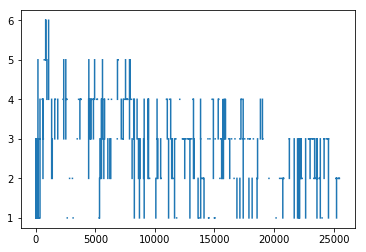

In [103]:
plt.plot(s)

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
[njugadors(2)]

2

In [65]:
[len(eval(d['game_frame'].players[i])) for i in range(len(d['game_frame'])) if type(d['game_frame'].players[i]) == str]

KeyboardInterrupt: 

In [28]:
d['player_kill']

,gameid,timestamp,server_ip,server_name,killer_guid,victim_guid,frames
0,185,1542271482,176.57.0.0,GameSession,76561198137289456,76561198071381372,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
1,185,1542271605,162.244.0.0,GameSession,76561198124223758,76561198188131502,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
2,185,1542271623,162.244.0.0,GameSession,76561198797730160,76561198258586752,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
3,185,1542271667,176.57.0.0,GameSession,76561198088349192,76561198123513546,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
4,185,1542271671,176.57.0.0,GameSession,76561198062130779,76561198870484527,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
5,185,1542271727,176.57.0.0,GameSession,76561198055814661,76561198833744190,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
6,185,1542271964,162.244.0.0,GameSession,76561198124223758,76561198869630926,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
7,185,1542271942,176.57.0.0,GameSession,76561198071381372,76561198192879225,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."
8,185,1542272015,176.57.0.0,GameSession,76561198060054396,76561198868862778,"[{""killer"": {""tickflags"": 32, ""fov"": 90, ""posi..."
9,185,1542272025,176.57.0.0,GameSession,76561198210391304,76561198361901786,"[{""killer"": {""tickflags"": 0, ""fov"": 90, ""posit..."


In [31]:
d['player_state']

,gameid,sessionid,playerguid,framenumber,frametime_ms,posX,posY,posZ,viewW,viewX,viewY,viewZ,tickflags,stateflags,fov,health,weapon_id
0,185,2687592411372870805,Lori_Ross,5433,0,-122429.656250,-3137.966309,2432.728516,0.546236,0.090341,0.059410,-0.830624,0,2,90,0,11
1,185,2687592411372870805,Lori_Ross,5653,6890,-124511.312500,-3208.429688,2434.120117,-0.469987,0.129939,-0.070177,-0.870232,0,2,90,0,11
2,185,2687592411372870805,Jesus_Roberts,5664,344,-124727.515625,-2825.187500,2253.628174,1.000000,0.000000,-0.000192,0.000000,0,4,0,0,0
3,185,2687592411372870805,Lori_Ross,5664,344,-124641.054688,-3015.759521,2386.918701,-0.475728,0.132527,-0.072760,-0.866502,0,0,90,0,11
4,185,2687592411372870805,Lori_Ross,5715,1597,-125007.289062,-2196.545166,2423.564697,-0.526463,0.116451,-0.073071,-0.839009,0,2,90,0,11
5,185,2687592411372870805,Lori_Ross,5764,1535,-124822.890625,-1523.803345,2398.206299,0.119125,0.201149,0.024653,-0.971978,0,2,90,0,11
6,185,2687592411372870805,Richard_Johnson,5775,345,-125062.359375,-1608.980469,2253.628174,1.000000,0.000000,0.000000,0.000000,0,4,0,0,0
7,185,2687592411372870805,Lori_Ross,5775,345,-124827.367188,-1470.983765,2253.628174,0.126081,0.126513,0.016214,-0.983786,0,0,90,0,11
8,185,2687592411372870805,Lori_Ross,5798,718,-125042.257812,-1401.001709,2253.628174,0.119050,0.132616,0.016047,-0.983861,0,2,90,0,11
9,185,2687592411372870805,Richard_Johnson,5811,406,-125062.359375,-1608.980469,2253.628174,1.000000,0.000000,0.000000,0.000000,0,4,0,0,0


In [30]:
d['game_session']

,gameid,sessionid,server_ip,server_name,time_started
0,185,2687592411372870805,176.57.0.0,GameSession,1542271473
1,185,4959622521749720164,176.57.0.0,GameSession,1542272070
2,185,4959622521749755856,176.57.0.0,GameSession,1542272381
3,185,4959622521749767844,139.99.0.0,GameSession,1542272486
4,185,2009668275080423366,162.244.0.0,GameSession,1542239681
5,185,2009668275080511993,45.35.0.0,GameSession,1542239982
6,185,2687592411368888385,162.244.0.0,GameSession,1542247507
7,185,6300479610403288849,45.35.0.0,GameSession,1542247623
8,185,4959622521745705167,176.57.0.0,GameSession,1542247630
9,185,2687592411368946525,162.244.0.0,GameSession,1542247712


In [34]:
d['game_frame']

,gameid,sessionid,framenumber,frametime_ms,players,events
0,185,2687592411372870805,5433,0,"[{""guid"": ""Lori_Ross"", ""state"": {""character_id...",NaN
1,185,2687592411372870805,5653,6890,"[{""guid"": ""Lori_Ross"", ""state"": {""character_id...",NaN
2,185,2687592411372870805,5664,344,"[{""guid"": ""Jesus_Roberts"", ""state"": {""characte...",NaN
3,185,2687592411372870805,5715,1597,"[{""guid"": ""Lori_Ross"", ""state"": {""character_id...",NaN
4,185,2687592411372870805,5764,1535,"[{""guid"": ""Lori_Ross"", ""state"": {""character_id...",NaN
5,185,2687592411372870805,5775,345,"[{""guid"": ""Richard_Johnson"", ""state"": {""charac...",NaN
6,185,2687592411372870805,5798,718,"[{""guid"": ""Lori_Ross"", ""state"": {""character_id...",NaN
7,185,2687592411372870805,5811,406,"[{""guid"": ""Richard_Johnson"", ""state"": {""charac...",NaN
8,185,2687592411372870805,5813,62,"[{""guid"": ""Jesus_Roberts"", ""state"": {""characte...",NaN
9,185,2687592411372870805,5903,2818,"[{""guid"": ""Lori_Ross"", ""state"": {""character_id...",NaN


In [37]:
d['player_state'].health

0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
          ... 
7896982    250
7896983    250
7896984    500
7896985    250
7896986    250
7896987    500
7896988    250
7896989    250
7896990    500
7896991    250
7896992    500
7896993    250
7896994    250
7896995    500
7896996    250
7896997    250
7896998    500
7896999    250
7897000    250
7897001    500
7897002    250
7897003    250
7897004    500
7897005    250
7897006    250
7897007    500
7897008    250
7897009    500
7897010    250
7897011    500
Name: health, Length: 7897012, dtype: int64

In [36]:
d['game_session']

,gameid,sessionid,server_ip,server_name,time_started
0,185,2687592411372870805,176.57.0.0,GameSession,1542271473
1,185,4959622521749720164,176.57.0.0,GameSession,1542272070
2,185,4959622521749755856,176.57.0.0,GameSession,1542272381
3,185,4959622521749767844,139.99.0.0,GameSession,1542272486
4,185,2009668275080423366,162.244.0.0,GameSession,1542239681
5,185,2009668275080511993,45.35.0.0,GameSession,1542239982
6,185,2687592411368888385,162.244.0.0,GameSession,1542247507
7,185,6300479610403288849,45.35.0.0,GameSession,1542247623
8,185,4959622521745705167,176.57.0.0,GameSession,1542247630
9,185,2687592411368946525,162.244.0.0,GameSession,1542247712
